# **DESKRIPSI SOAL**

Diberikan sebuah data anggur.csv yang dapat diakses pada utas berikut: Dataset Tugas Besar
IF2220. anggur.csv merupakan data metrik kualitas wine (minuman anggur) yang
mengandung 12 kolom sebagai berikut:
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality
Kolom 1-11 adalah kolom atribut (non-target), sedangkan kolom 12 adalah kolom
target. 

# **SOAL 1**

Deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat
numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum,
maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Membaca data anggur dari file CSV
# url = 'https://example.com/data.csv'
# df = pd.read_csv(url)

df = pd.read_csv('C:/Users/62822/Downloads/anggur.csv')

# Mendapatkan deskripsi statistika dari semua kolom numerik
stats = pd.DataFrame({
    "Mean": df.mean(),
    "Median": df.median(),
    "Mode": df.mode().iloc[0], # Modus bisa memiliki lebih dari satu nilai, maka diambil yang pertama
    "Std Dev": df.std(),
    "Variance": df.var(),
    "Range": df.max() - df.min(),
    "Min": df.min(),
    "Max": df.max(),
    "Q1": df.quantile(0.25),
    "Q2": df.quantile(0.5),
    "Q3": df.quantile(0.75),
    "IQR": df.quantile(0.75) - df.quantile(0.25),
    "Skewness": skew(df),
    "Kurtosis": kurtosis(df)
})

# Menampilkan deskripsi statistika dalam bentuk tabel
print(stats.transpose())


          fixed acidity  volatile acidity  citric acid  residual sugar  \
Mean           7.152530          0.520839     0.270517        2.567104   
Median         7.150000          0.524850     0.272200        2.519430   
Mode           6.540000          0.554600     0.301900        0.032555   
Std Dev        1.201598          0.095848     0.049098        0.987915   
Variance       1.443837          0.009187     0.002411        0.975977   
Range          8.170000          0.665200     0.292900        5.518200   
Min            3.320000          0.139900     0.116700        0.032555   
Max           11.490000          0.805100     0.409600        5.550755   
Q1             6.377500          0.456100     0.237800        1.896330   
Q2             7.150000          0.524850     0.272200        2.519430   
Q3             8.000000          0.585375     0.302325        3.220873   
IQR            1.622500          0.129275     0.064525        1.324544   
Skewness      -0.028835         -0.197

# **SOAL 2**

Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap
kolom numerik.

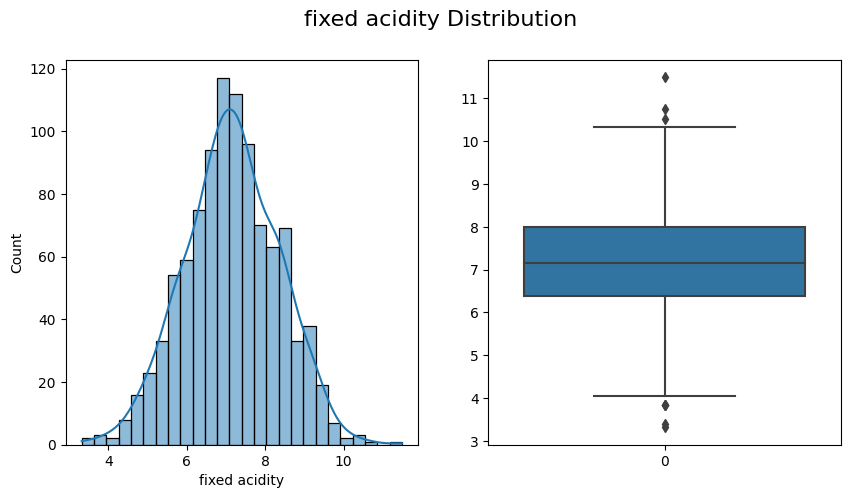

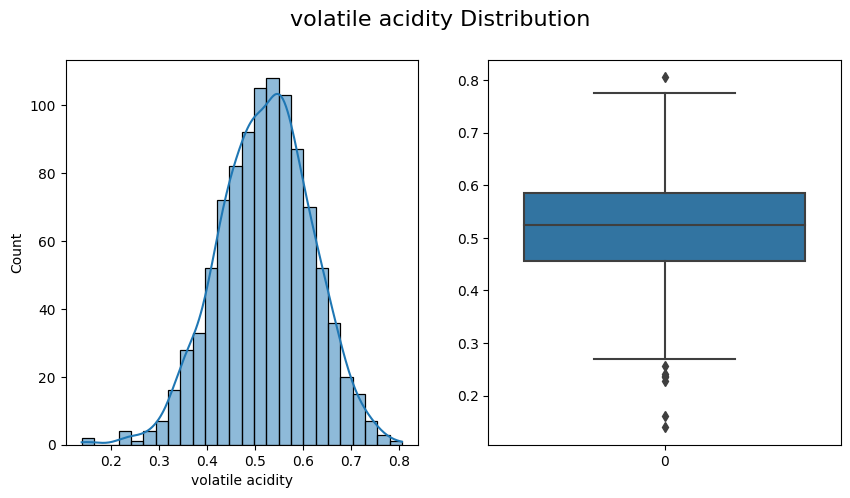

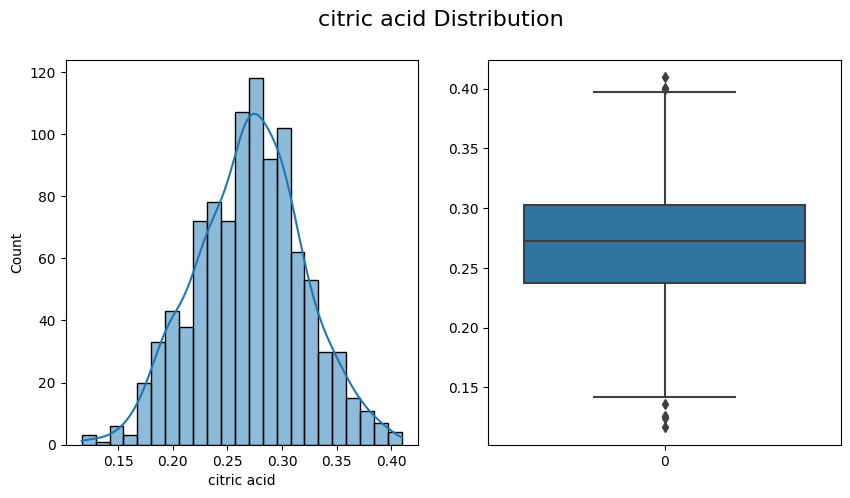

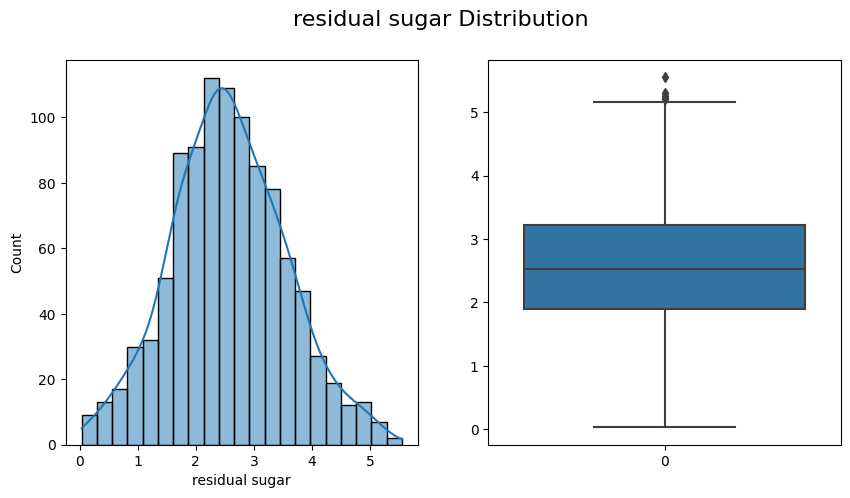

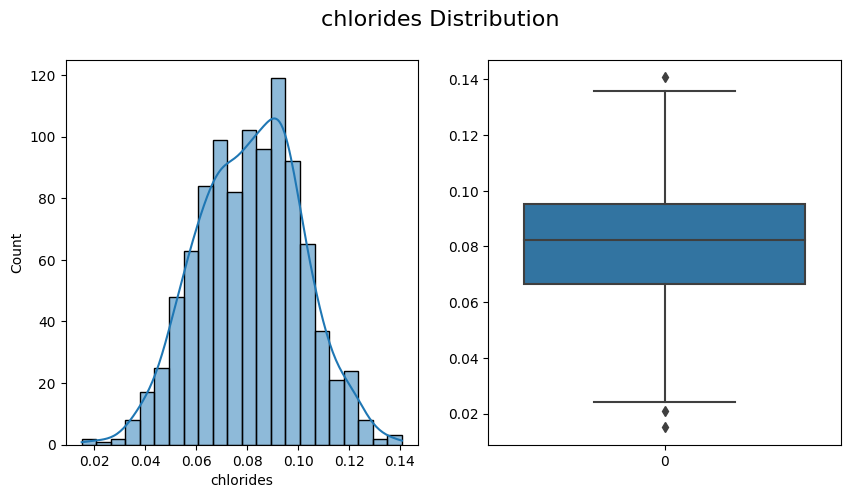

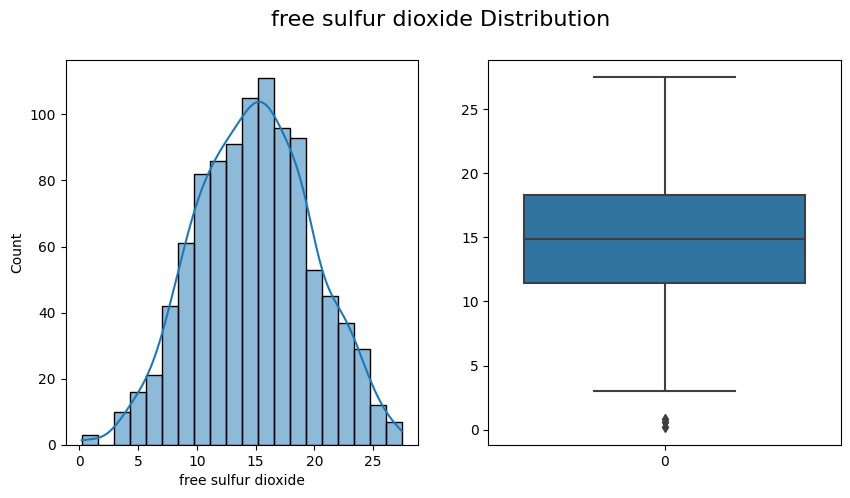

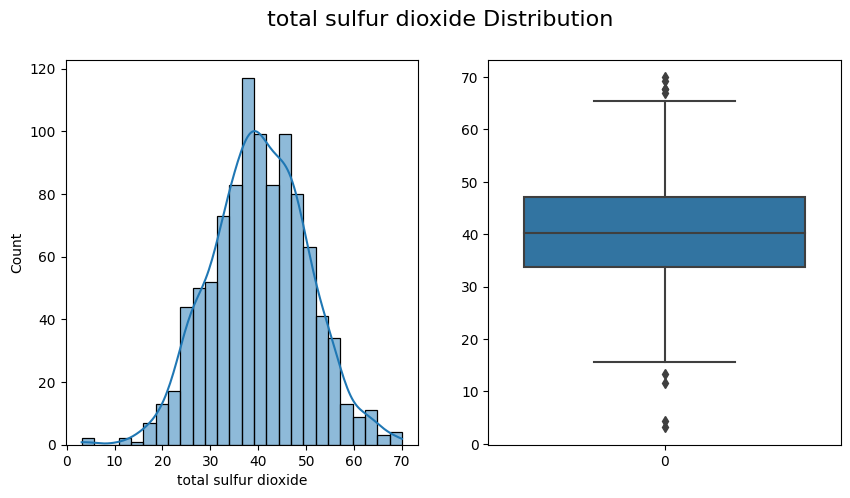

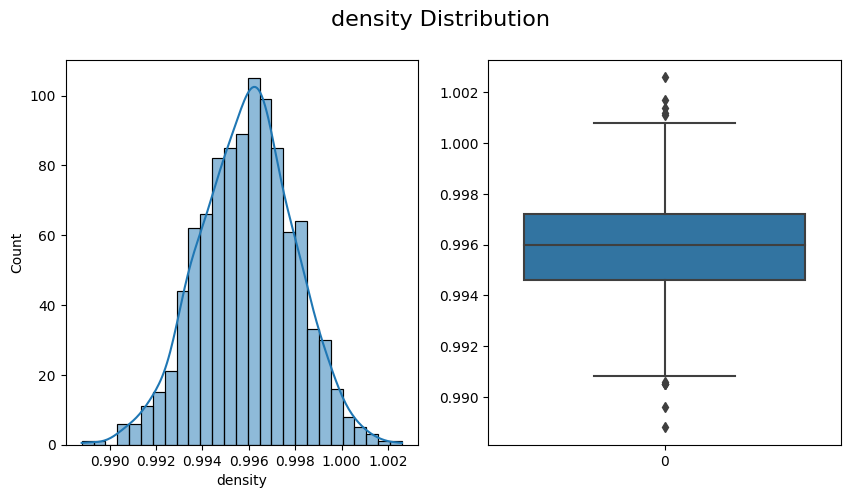

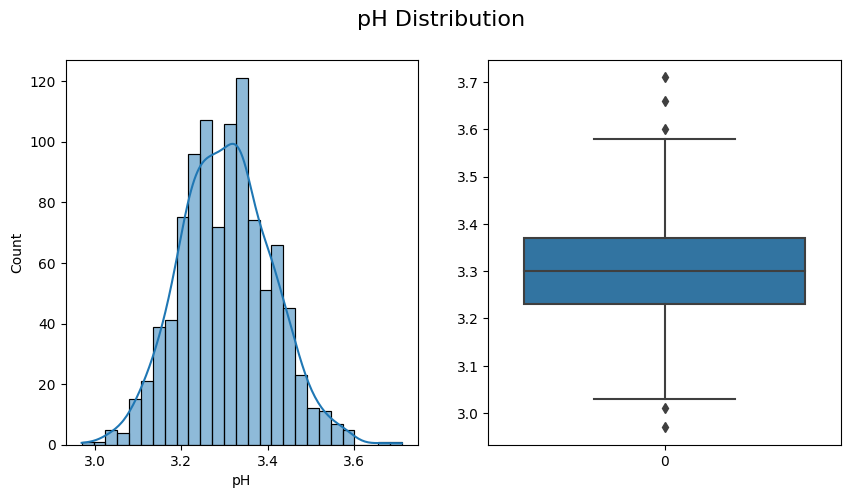

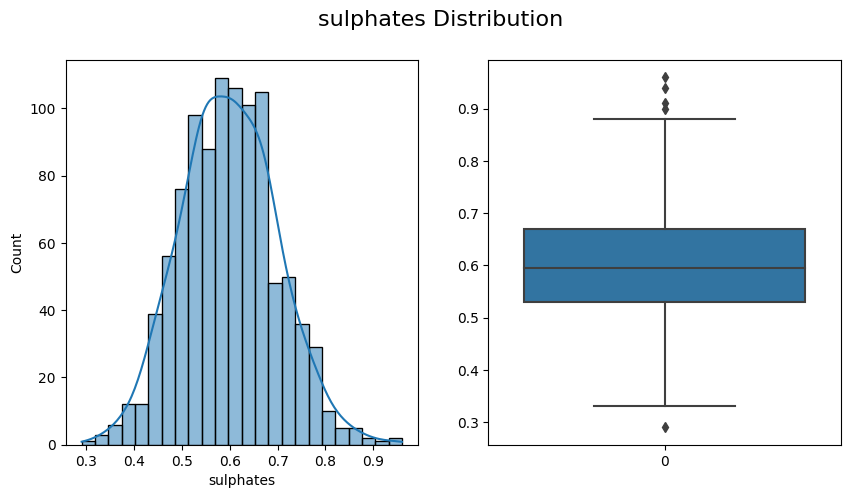

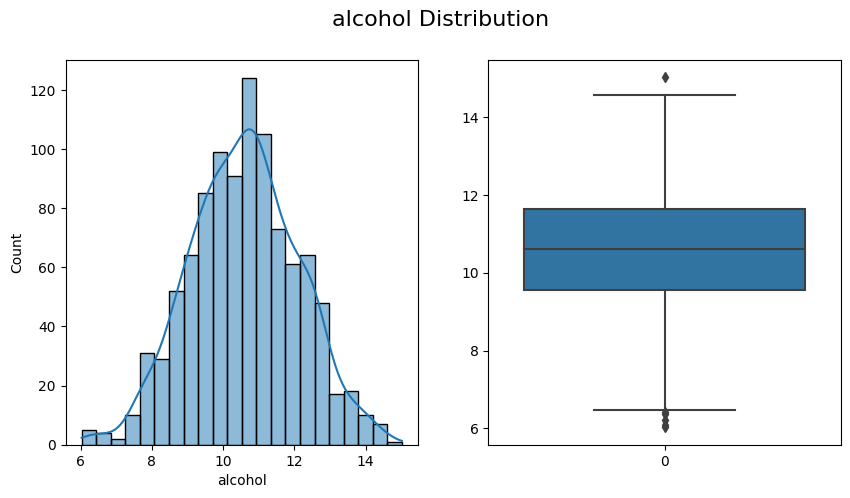

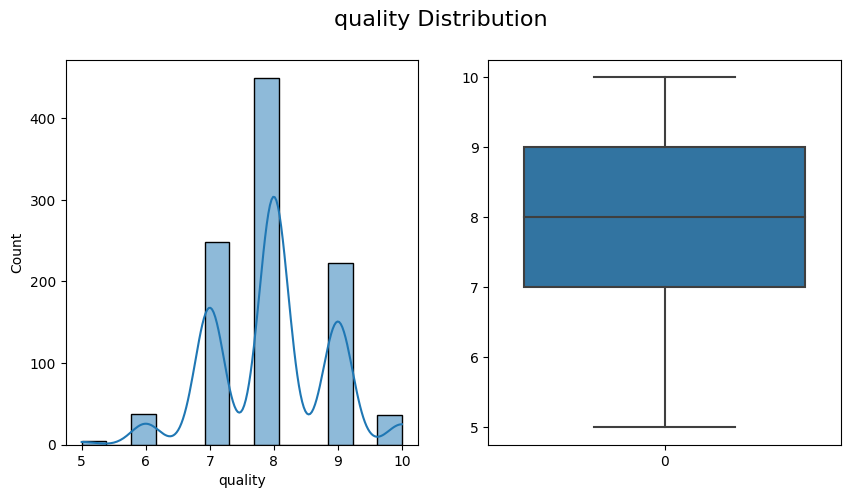

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset
df = pd.read_csv("C:/Users/62822/Downloads/anggur.csv")

# plot histogram and boxplot for each numeric column
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    sns.histplot(ax=axes[0], data=df[col], kde=True)
    sns.boxplot(ax=axes[1], data=df[col])
    fig.suptitle(f"{col} Distribution", fontsize=16)
    plt.show()


# **SOAL 3**

Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test
yang dikaitkan dengan histogram plot.

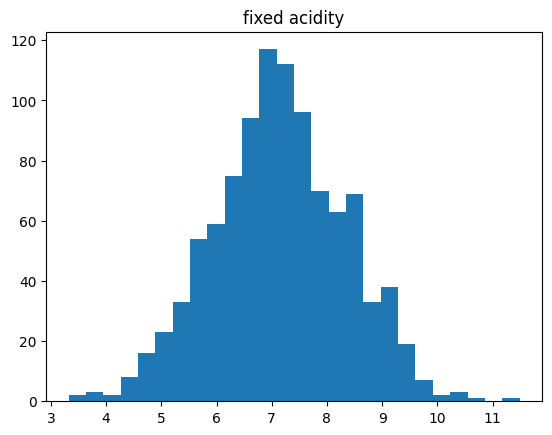

Normality test result for fixed acidity :
Statistic = 0.14329615661430725 , p-value = 0.9308584274486692
fixed acidity is normally distributed


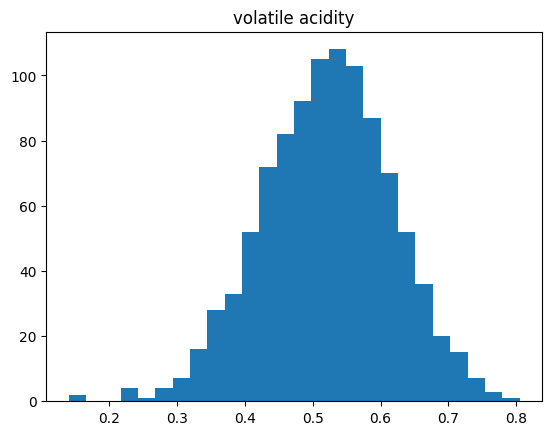

Normality test result for volatile acidity :
Statistic = 7.581251985533493 , p-value = 0.022581461594113835
volatile acidity is not normally distributed


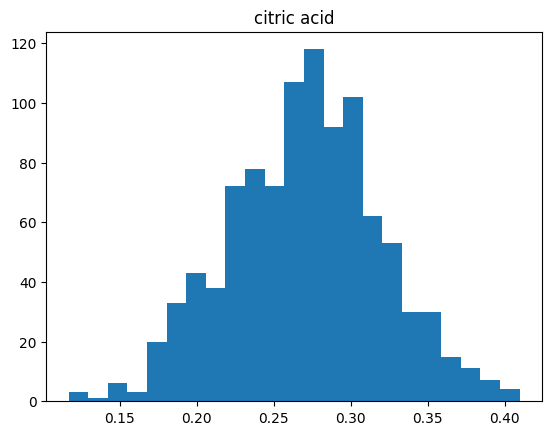

Normality test result for citric acid :
Statistic = 0.7663607229418252 , p-value = 0.6816899375976969
citric acid is normally distributed


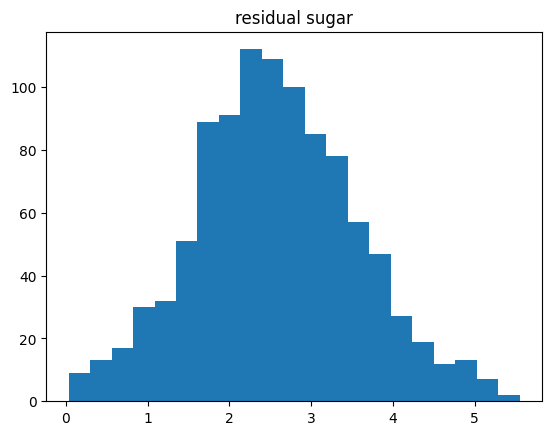

Normality test result for residual sugar :
Statistic = 2.9862716504538622 , p-value = 0.2246670332131056
residual sugar is normally distributed


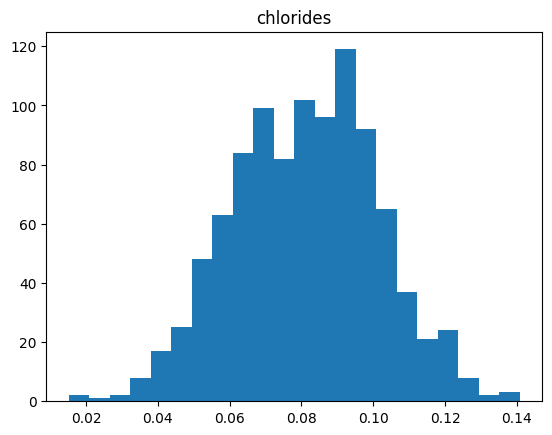

Normality test result for chlorides :
Statistic = 3.538242355484952 , p-value = 0.17048274704296862
chlorides is normally distributed


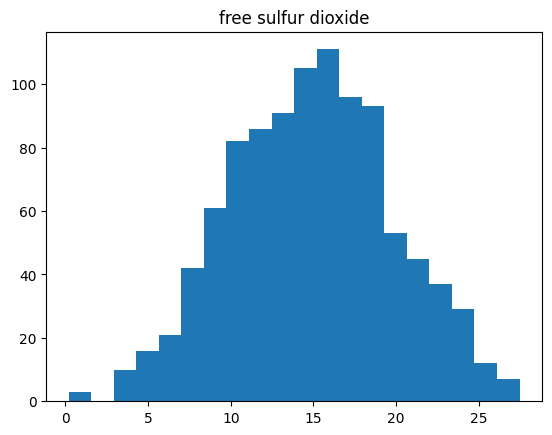

Normality test result for free sulfur dioxide :
Statistic = 8.099074980855514 , p-value = 0.01743043451827735
free sulfur dioxide is not normally distributed


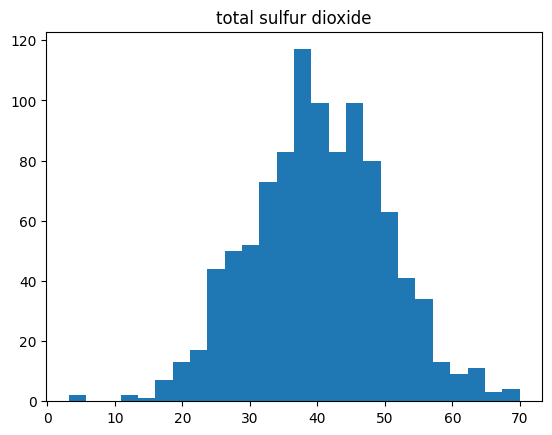

Normality test result for total sulfur dioxide :
Statistic = 0.3276640291639825 , p-value = 0.8488846101395726
total sulfur dioxide is normally distributed


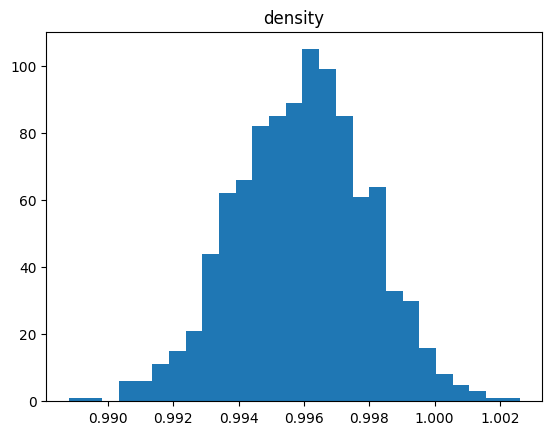

Normality test result for density :
Statistic = 1.026581544320803 , p-value = 0.5985227325531981
density is normally distributed


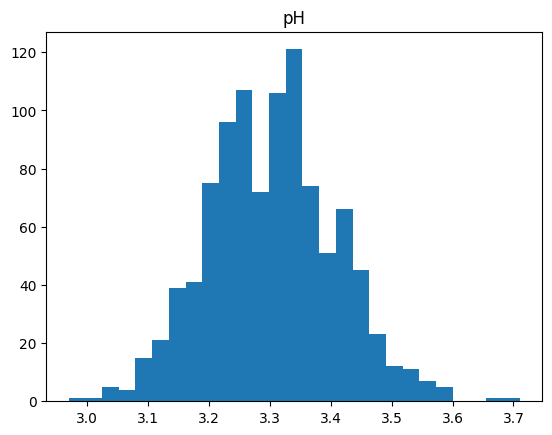

Normality test result for pH :
Statistic = 3.9786546459928545 , p-value = 0.13678740824860436
pH is normally distributed


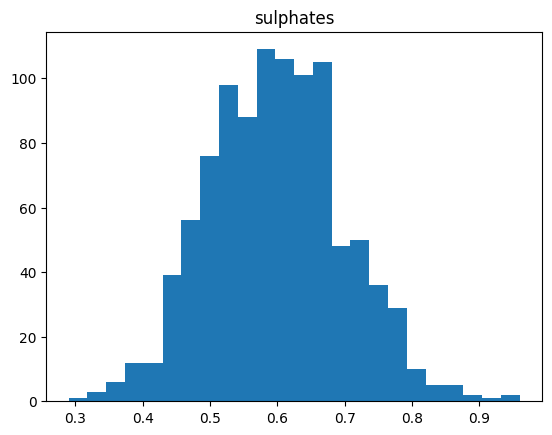

Normality test result for sulphates :
Statistic = 3.948820277859041 , p-value = 0.13884318628391681
sulphates is normally distributed


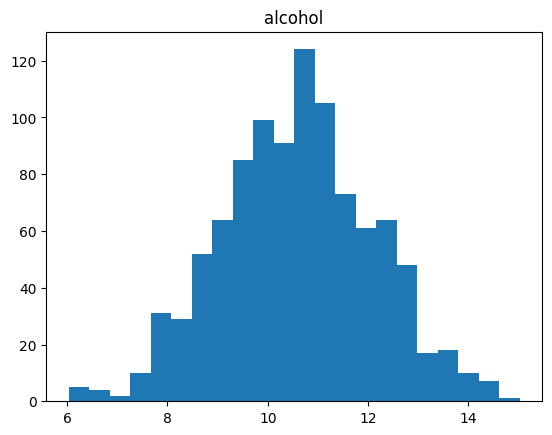

Normality test result for alcohol :
Statistic = 0.7740076714171271 , p-value = 0.6790884901361043
alcohol is normally distributed


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load dataset
df = pd.read_csv('C:/Users/62822/Downloads/anggur.csv')

# Define columns to be tested
numeric_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                'pH', 'sulphates', 'alcohol']

# Loop through each column and perform normality test
for col in numeric_cols:
    # Plot histogram
    plt.hist(df[col], bins='auto')
    plt.title(col)
    plt.show()
    
    # Perform normality test
    stat, p = stats.normaltest(df[col])
    print('Normality test result for', col, ':')
    print('Statistic =', stat, ', p-value =', p)
    
    # Determine if the distribution is normal or not
    alpha = 0.05
    if p > alpha:
        print(col, 'is normally distributed')
    else:
        print(col, 'is not normally distributed')


# **SOAL 4**

Melakukan test hipotesis 1 sampel,
a. Nilai rata-rata pH di atas 3.29?
b. Nilai rata-rata Residual Sugar tidak sama dengan 2.50?
c. Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?
d. Nilai rata-rata total sulfur dioxide di bawah 35?
e. Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah tidak sama dengan 50% ?


# **SOAL 5**

Melakukan test hipotesis 2 sampel,
a. Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom.
Benarkah rata-rata kedua bagian tersebut sama?
b. Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah
rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?
c. Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan
rata-rata 25 baris pertama kolom Sulphates ?
d. Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?
e. Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar
daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?